In [4]:
import numpy as np
import pandas as pd

In [6]:
df = pd.DataFrame({"Age":[15,18,"18",19.4,"220+"],
                    "Gender":["male","female","female","female","male"]})
df

,Age,Gender
0,15,male
1,18,female
2,18,female
3,19.4,female
4,220+,male


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     5 non-null      object
 1   Gender  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [10]:
df["Age"].unique()

array([15, 18, '18', 19.4, '220+'], dtype=object)

In [12]:
df = df.replace({"Age": {"20+": 20}})
df

,Age,Gender
0,15,male
1,18,female
2,18,female
3,19.4,female
4,220+,male


In [14]:
df.replace({"220+":20},inplace=True)
df

,Age,Gender
0,15,male
1,18,female
2,18,female
3,19.4,female
4,20,male


In [16]:
df["Age"] = df ["Age"].astype("float")
df

,Age,Gender
0,15.0,male
1,18.0,female
2,18.0,female
3,19.4,female
4,20.0,male


In [18]:
df.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [20]:
df.duplicated().sum()

1

In [22]:
df[df.duplicated()]

,Age,Gender
2,18.0,female


In [24]:
df[~df.duplicated()]

,Age,Gender
0,15.0,male
1,18.0,female
3,19.4,female
4,20.0,male


In [26]:
df.drop_duplicates(inplace=True,ignore_index=True)
df

,Age,Gender
0,15.0,male
1,18.0,female
2,19.4,female
3,20.0,male


In [33]:
df = pd.DataFrame({"Age":[15,np.nan,24,19,20,22],
                  "Gender":["male",np.nan,"female","female","male",np.nan]})
df

,Age,Gender
0,15.0,male
1,NaN,NaN
2,24.0,female
3,19.0,female
4,20.0,male
5,22.0,NaN


In [35]:
df.isnull()

,Age,Gender
0,False,False
1,True,True
2,False,False
3,False,False
4,False,False
5,False,True


In [37]:
df.isnull().sum()

Age       1
Gender    2
dtype: int64

In [39]:
df.isnull().sum()/len(df)*100

Age       16.666667
Gender    33.333333
dtype: float64

In [45]:
df2 = df.dropna()
df2

,Age,Gender
0,15.0,male
2,24.0,female
3,19.0,female
4,20.0,male


In [49]:
df1 = df.drop(columns=["Gender"])
df1

,Age
0,15.0
1,NaN
2,24.0
3,19.0
4,20.0
5,22.0


In [51]:
df["Age"].fillna(20)

0    15.0
1    20.0
2    24.0
3    19.0
4    20.0
5    22.0
Name: Age, dtype: float64

In [61]:
 df["Age"].fillna(df["Age"].mean())

0    15.0
1    20.0
2    24.0
3    19.0
4    20.0
5    22.0
Name: Age, dtype: float64

In [63]:
df["Age"].fillna(df["Age"].median())

0    15.0
1    20.0
2    24.0
3    19.0
4    20.0
5    22.0
Name: Age, dtype: float64

In [69]:
df["Gender"].fillna(df["Gender"].mode()[0])

0      male
1      male
2    female
3    female
4      male
5      male
Name: Gender, dtype: object

In [71]:
df = pd.DataFrame({"marks":[10,11,12,25,25,27,31,33,34,34,36,36,43,50,59]})
df

,marks
0,10
1,11
2,12
3,25
4,25
5,27
6,31
7,33
8,34
9,34


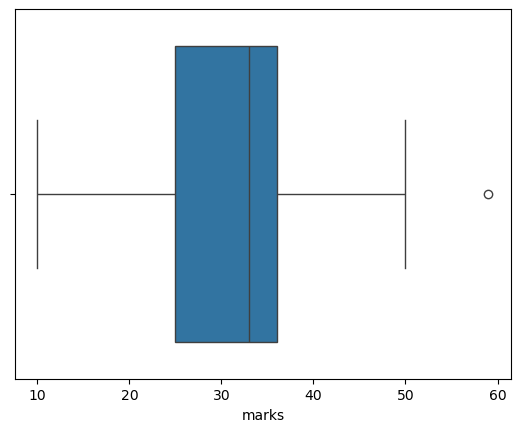

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df["marks"])
plt.show()

In [85]:
Q1 = df["marks"].quantile(0.25)
print("Q1:",Q1)

Q3 = df["marks"].quantile(0.75)
print("Q3:",Q3)

IQR = Q3 - Q1
print("IQR:",IQR)

lower_limit = Q1-(IQR * 1.5)
print("lower limit",lower_limit)

upper_limit = Q3 + (IQR * 1.5)
print("upper limit",upper_limit)

Q1: 25.0
Q3: 36.0
IQR: 11.0
lower limit 8.5
upper limit 52.5


In [89]:
df[(df["marks"]<lower_limit) | (df["marks"]>upper_limit)]

,marks
14,59


In [91]:
df.drop(index=[14])

,marks
0,10
1,11
2,12
3,25
4,25
5,27
6,31
7,33
8,34
9,34


In [95]:
df["marks"] = df["marks"].clip(lower=8.5,upper=52.5)
df

,marks
0,10.0
1,11.0
2,12.0
3,25.0
4,25.0
5,27.0
6,31.0
7,33.0
8,34.0
9,34.0


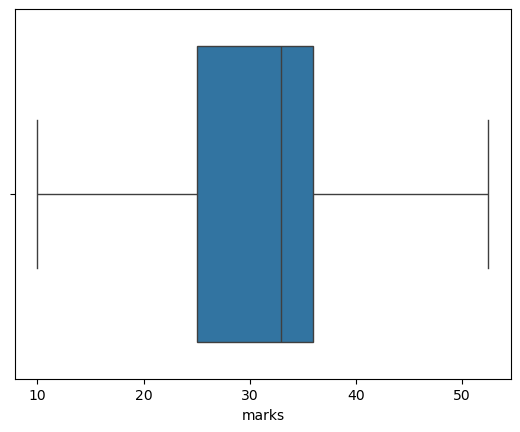

In [97]:
sns.boxplot(x=df["marks"])
plt.show()